In [1]:
import numpy as np
from matplotlib.pyplot import subplots, show, close
import BrennSpec as bs

In [2]:
data = np.loadtxt("baseline_subtracted.txt")

In [3]:
absorption = bs.AbsorptionSpectrum(data)

In [7]:
a = absorption.get_peaks()
print(*list(zip(*a)))

(199, 4174.680702681918) (1597, 769.5798283428217) (1863, 659.5675668364397)


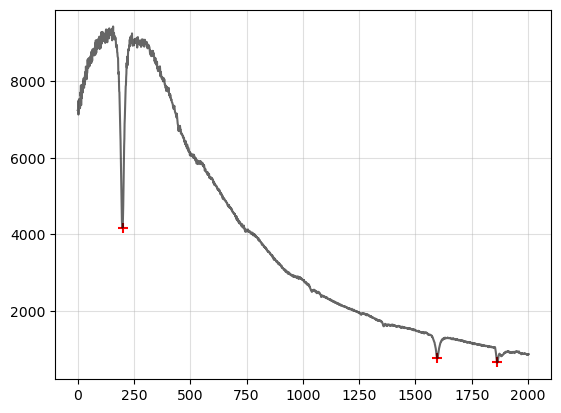

In [4]:
fig, ax = subplots()
x, y = absorption.get_peaks()
ax.scatter(x, y, color='r', marker='+', s=50)
ax.plot(absorption.array, alpha=0.6, color='k')
ax.grid(alpha=0.4)
show()
close(fig)

In [2]:
data = np.loadtxt("Arcturus.txt")
absorption = bs.AbsorptionSpectrum(data)

In [3]:
from matplotlib.pyplot import Slider

In [76]:
def magic_numbers(axis, temperature=9000, offset=350, scale=1.1e-11):
    """Forgive me father for I have fudged the dice"""
    # temperature += 2000
    testx = axis
    testx *= 1e-9
    testy = blackbody_curve(testx, temperature)
    if True:
        scale = (absorption.array.max() - 1500) / testy.max()
        y = testy * scale
    else:
        y = (testy + offset) * scale
    print(type(y))
    return y


def blackbody_curve(wavelength, temperature: float = 11000, base: float = 0):
    c = 3 * 10 ** 8
    h = 6.26 * 10 ** -34
    kB = 1.38 * 10 ** -23
    c1, c2 = 2 * h * c ** 2, h * c / kB
    wl = np.array(wavelength)
    print(c2 / (wl * temperature))
    curve = c1 / wl ** 5 * (1 / (np.exp(c2 / (wl * temperature)) - 1)) + base
    return curve

In [109]:
%matplotlib Tk

absorption.peak_x = absorption.array.argmax()

magic = [330, 1300, 3200, 0, 1e-10]

fig, ax = subplots()
# x, y = absorption.get_peaks()
# ax.scatter(x, y, color='r', marker='+', s=50)
xsize = absorption.array.size
xaxis = np.linspace(10, xsize, xsize)
print(xsize, xaxis)
line = ax.plot(xaxis * 1e0, magic_numbers(xaxis, *magic[2:]))

# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.3, bottom=0.4)

# Make a horizontal slider to control the frequency.
axT = fig.add_axes([0.1, 0.25, 0.0225, 0.63])
T_slider = Slider(
    ax=axT,
    label='Temp',
    valmin=500,
    valmax=11000,
    valinit=magic[2],
    orientation='vertical'
)
# Make a vertically oriented slider to control the amplitude
# axamp = fig.add_axes([0.15, 0.25, 0.0225, 0.63])
# amp_slider = Slider(
#     ax=axamp,
#     label="Amp",
#     valmin=6,
#     valmax=11,
#     valinit=8,
#     orientation="vertical"
# )
# Make a vertically oriented slider to control the amplitude
# axmin = fig.add_axes([0.35, 0.25, 0.53, 0.0225])
# min_slider = Slider(
#     ax=axmin,
#     label="Left bound",
#     valmin=1,
#     valmax=2000,
#     valinit=magic[0],
#     orientation="horizontal"
# )
# # Make a vertically oriented slider to control the amplitude
# axmax= fig.add_axes([0.35, 0.3, 0.53, 0.0225])
# max_slider = Slider(
#     ax=axmax,
#     label="Right bound",
#     valmin=1000,
#     valmax=4000,
#     valinit=magic[1],
#     orientation="horizontal"
# )

axscale = fig.add_axes([0.35, 0.3, 0.53, 0.0225])
scale_slider = Slider(
    ax=axscale,
    label='Scale',
    valmin=-5,
    valmax=2,
    valinit=0,
    orientation='horizontal'
)


# The function to be called anytime a slider's value changes
def update(val):
    ax.cla()
    ax.set_xlim([-100, 2100])
    ax.set_ylim([5000, 40000])
    ax.plot(absorption.array, alpha=0.6, color='k')
    scale = 10 ** scale_slider.val
    curv = magic_numbers(np.linspace(50, 3000, xsize),
                         T_slider.val, magic[3], 10 ** (-amp_slider.val))
    curv_argmax = curv.argmax()
    dat_argmax = absorption.peak_x + 50
    final_x = (xaxis * 1e9 - curv_argmax) * scale + dat_argmax
    ax.plot(final_x, curv)
    fig.canvas.draw_idle()


# register the update function with each slider


ax.plot(absorption.array, alpha=0.6, color='k')
ax.grid(alpha=0.4)
ax.set_xlim([-100, 2100])
ax.set_ylim([5000, 40000])
show()
# close(fig)
# amp_slider.on_changed(update)
T_slider.on_changed(update)
scale_slider.on_changed(update)
# max_slider.on_changed(update)
# min_slider.on_changed(update)


<IPython.core.display.Javascript object>

2004 [  10.           10.99550674   11.99101348 ... 2002.00898652 2003.00449326
 2004.        ]
[425.27173913 386.7686585  354.65871158 ...   2.12422493   2.12316917
   2.12211447]
<class 'numpy.ndarray'>


0

In [30]:
def testfunc(x, a):
    return x + a


x = np.linspace(-5, 5, 10)

fig, ax = subplots()
line = ax.plot(x, testfunc(x, 0))
ax.grid(alpha=0.2)
fig.subplots_adjust(left=0.2, bottom=0.2)

ax_slide = fig.add_axes([0.2, 0.1, 0.7, 0.05])
slide = Slider(ax_slide, label="a", valmin=-5, valmax=5, valinit=0, orientation='horizontal')


def update(val):
    ax.cla()
    ax.plot(x, testfunc(x, slide.val))
    fig.canvas.draw_idle()


slide.on_changed(update)

show()



<IPython.core.display.Javascript object>